In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/2809496124_5f25b5946a.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/2438480600_40a1249879.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/1328423762_f7a88a8451.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/181171681_c5a1a82ded.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/abeja.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/26589803_5ba7000313.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/2709775832_85b4b50a57.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/238161922_55fa9a76ae.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/2670536155_c170f49cd0.jpg
/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/val/bees/2501530886_e20952b97d.jpg
/kaggle/input/pytorchtransferlearningtut

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision as vision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


In [61]:
mean=[0.3449,0.5780,0.8530]
std=[0.0855,0.1147,0.1913]
trans={
    "train":transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(100,padding=True,padding_mode="reflect"),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    "val":transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
        
}

In [62]:
ds=ImageFolder(root="/kaggle/input/pytorchtransferlearningtutorial/hymenoptera_data/train",transform=trans["train"])

In [63]:
i,j=ds[0]
i.shape

torch.Size([3, 100, 100])

In [64]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [65]:
dl=DataLoader(ds,batch_size=128,shuffle=True,pin_memory=True,num_workers=2)

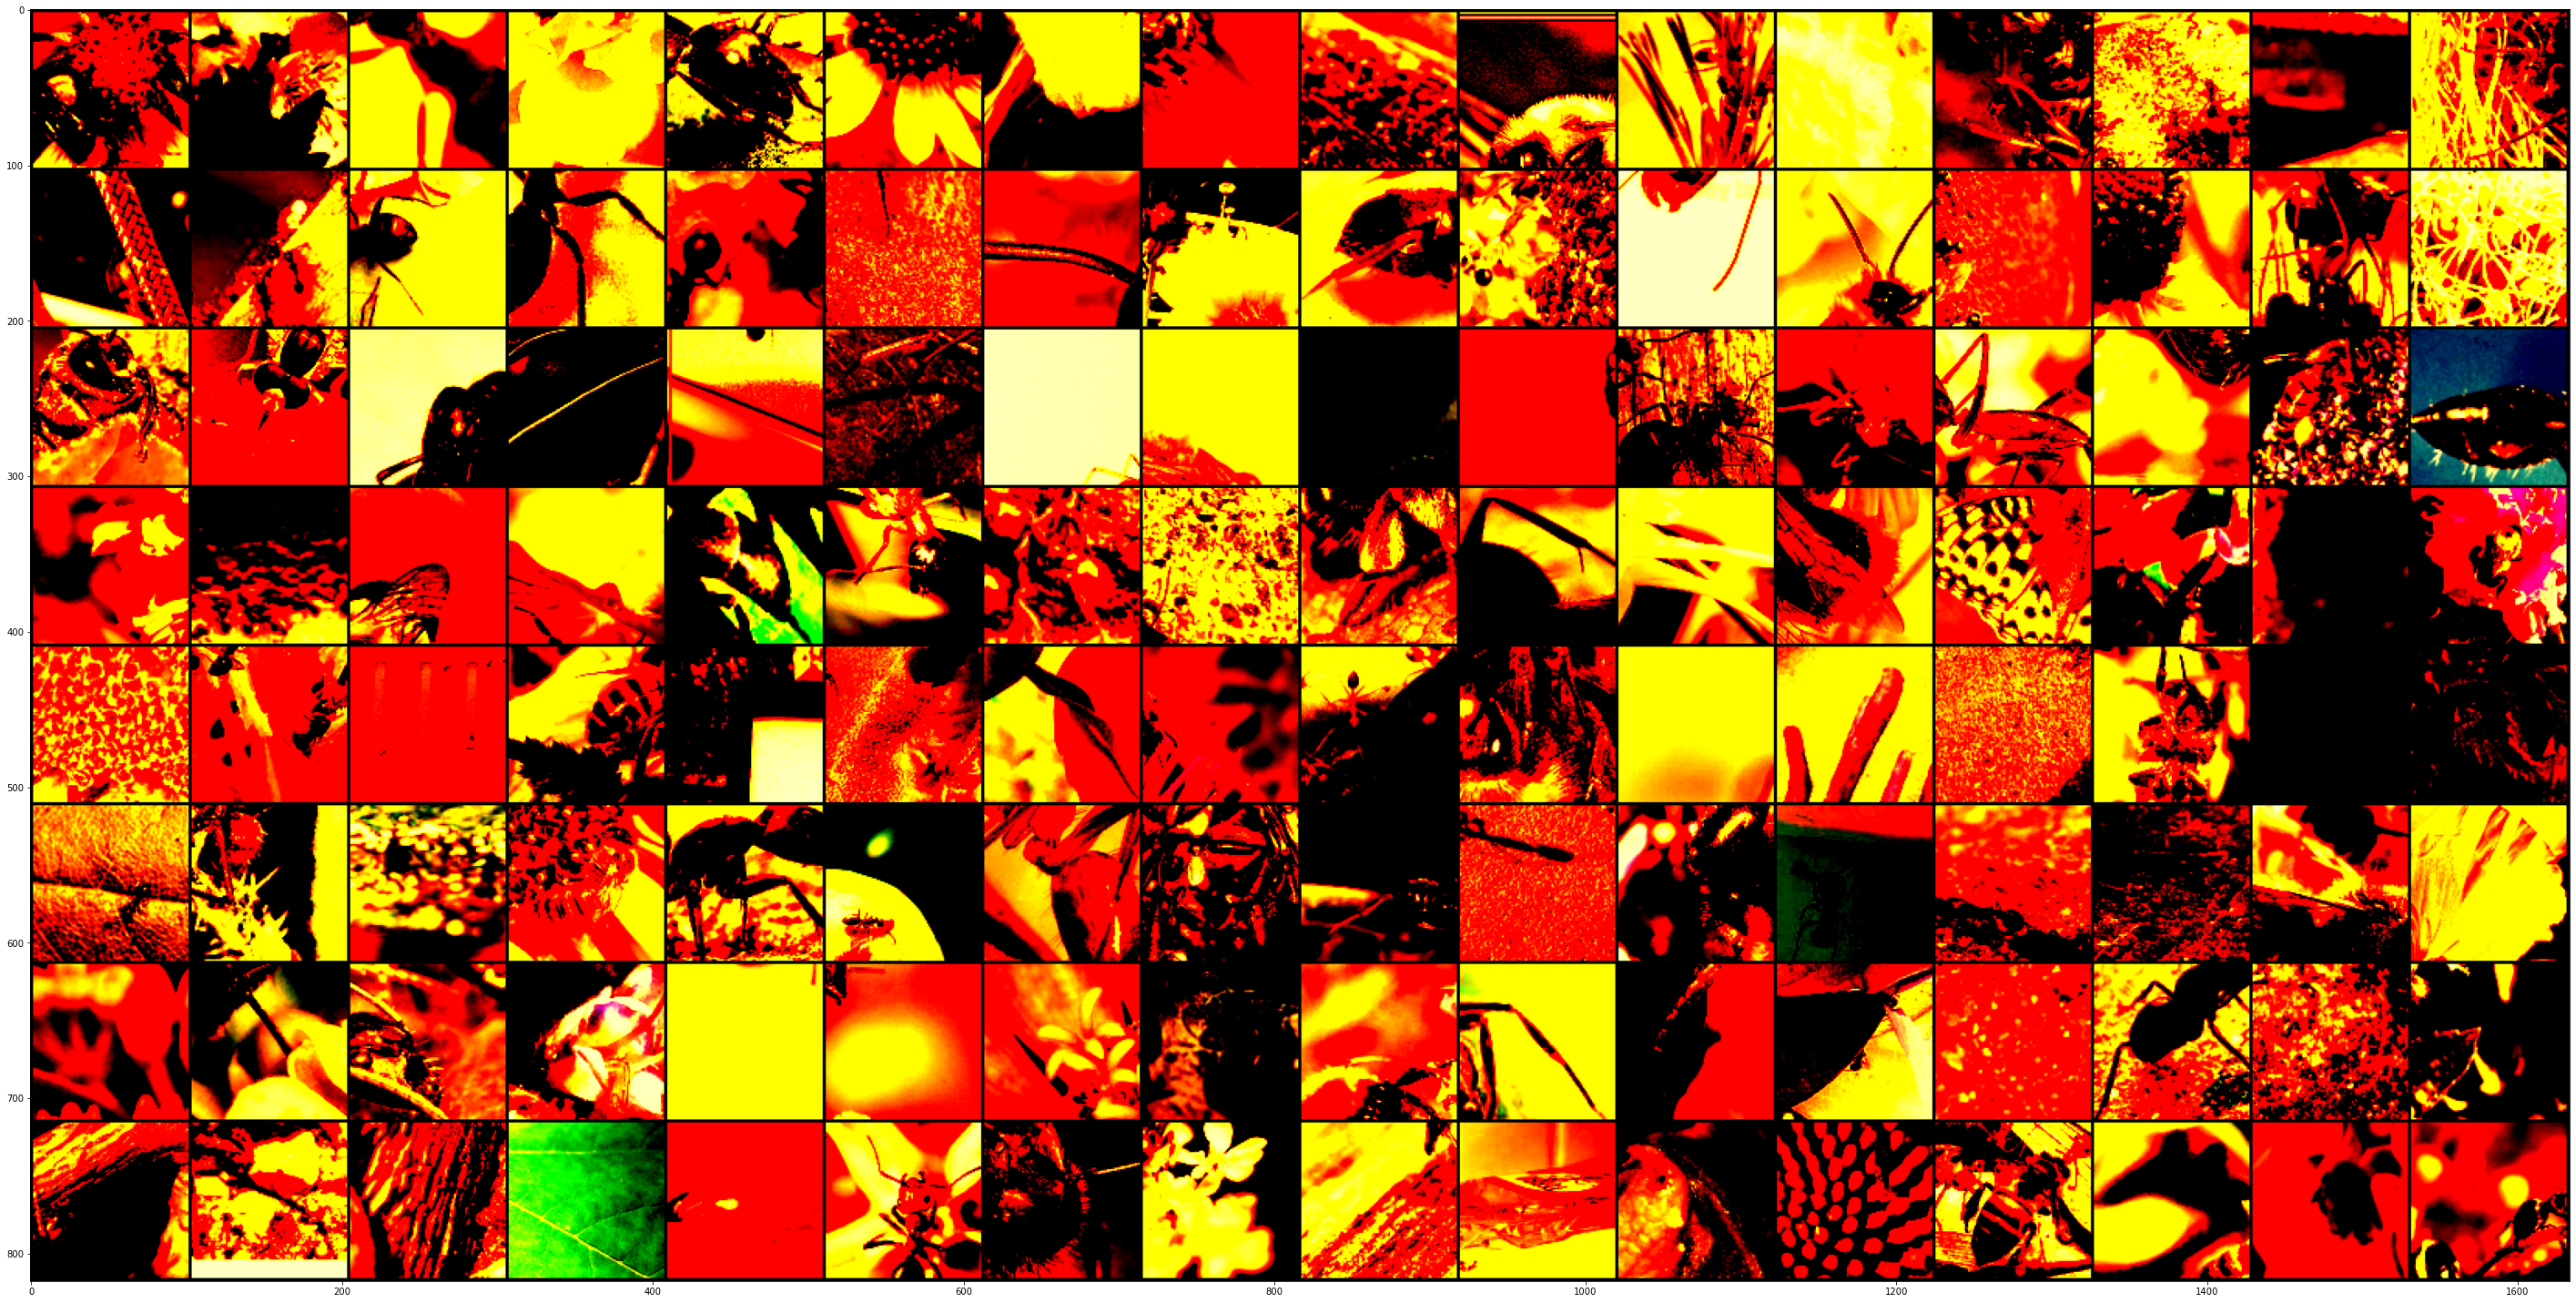

In [66]:
for i,j in dl:
    plt.figure(figsize=(50,85))
    plt.imshow(make_grid(i,nrow=16).permute(1,2,0))
    break

In [67]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [68]:
def train(model,loss,optim,sch,num_epoch,data):
    model.to(device)
    model.train()
    for i in range(num_epoch):
        for i,j in data:
            i=i.to(device)
            j=j.to(device)
            op=model(i)
            ls=loss(op,j)
            ls.backward()
            optim.step()
            optim.zero_grad()
        sch.step()
        acc=accuracy(op,j)
        print(f"loss={ls} acc={acc}")
            
        
    

In [69]:
model=models.resnet18(pretrained=True)
ip_features=model.fc.in_features
model.fc=nn.Linear(ip_features,2)


In [74]:

loss=nn.CrossEntropyLoss()
optim=torch.optim.SGD(model.parameters(),lr=0.1)
schedule=torch.optim.lr_scheduler.StepLR(optim,step_size=7,gamma=0.001)

In [ ]:
train(model,loss,optim,schedule,20,dl)


loss=0.7924994230270386 acc=0.6034482717514038
loss=6.0118794441223145 acc=0.5086206793785095
loss=3.7074525356292725 acc=0.5862069129943848
loss=0.7494394183158875 acc=0.568965494632721
loss=2.275123119354248 acc=0.4568965435028076
loss=0.7008633613586426 acc=0.5
loss=1.673871397972107 acc=0.5517241358757019
loss=0.7257201075553894 acc=0.5431034564971924
loss=0.7313616275787354 acc=0.5948275923728943
